In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as ran
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

#!wget https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/OJ.csv
data = pd.read_csv('OJ.csv')
#data


In [13]:
def recta(x,m=-7/3,b=0.8):
    return x*m+b

def recta2(x1,x2,b0,b1,b2):
    return b0 + b1*x1+b2*x2
    



def model(x1,x2,b0,b1,b2):
    return b0 + b1*x1+b2*x2

def loglikelihood(x1_obs, x2_obs, y_obs, b0,b1,b2):
    d = y_obs -  model(x1_obs,x2_obs,b0,b1,b2)
    d = d/y_obs.std()
    d = -0.5 * np.sum(d**2)
    return d

def logprior(b0,b1,b2):
    p = -np.inf
    if b0 >-1.0 and b0<1.0 and b1 >-1.0 and b1<1.0 and b2 >-1.0 and b2<1.0 :
        p = 0.0
    return p



X=data['LoyalCH'].copy()
Y=data['PriceDiff'].copy()
Z=data['Purchase'].copy()
Z[Z == 'CH'] = 1
Z[Z == 'MM'] = -1
ii = (Z==1)
#x =  np.linspace(np.min(X),np.max(X), 100)
x =  np.linspace(0,1, 100)
#y =  np.linspace(np.min(Y),np.max(Y), 100)
y =  np.linspace(0,1, 100)

def MC(sigmas,N = 5000):
    
    lista_b0 = [ran.random()*2-1]
    lista_b1 = [ran.random()*2-1]
    lista_b2 = [ran.random()*2-1]
    logposterior = [loglikelihood(X,Y, Z, lista_b0[0], lista_b1[0], lista_b2[0]) 
                    + logprior(lista_b0[0], lista_b1[0], lista_b2[0])]
    
    

    for i in range(1,N):
        pb0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigmas[0])
        pb1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigmas[1])
        pb2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigmas[2])

        
        logposterior_viejo = loglikelihood(X,Y,Z, lista_b0[i-1], lista_b1[i-1], lista_b2[i-1]) + logprior(lista_b0[i-1], lista_b1[i-1], lista_b2[i-1])
        logposterior_nuevo = loglikelihood(X,Y,Z, pb0, pb1, pb2) + logprior(pb0, pb1, pb2)
        
        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            lista_b0.append(pb0)
            lista_b1.append(pb1)
            lista_b2.append(pb2)
            logposterior.append(logposterior_nuevo)
        else:
            lista_b0.append(lista_b0[i-1])
            lista_b1.append(lista_b1[i-1])
            lista_b2.append(lista_b2[i-1])
            logposterior.append(logposterior_viejo)
    lista_b0 = np.array(lista_b0)
    lista_b1 = np.array(lista_b1)
    lista_b2 = np.array(lista_b2)
    logposterior = np.array(logposterior)
    return np.median(lista_b0), np.median(lista_b1), np.median(lista_b2)
valores = MC([1,1,1])
print(valores)

(-0.4487800137002218, 0.946262792866363, 0.7482525582957195)


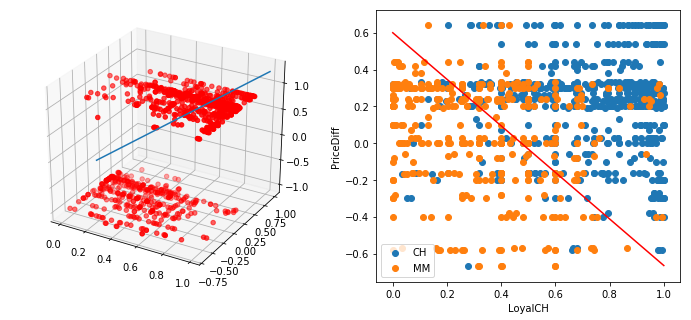

In [14]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121, projection='3d')

ax.scatter(X,Y,Z, c='r', marker='o')
ax.plot3D(x,y,model(b0=valores[0], b1=valores[1], b2=valores[2], x1=x, x2=y))

jj = (Z > valores[0]+valores[1]*X+valores[2]*Y)

fig.add_subplot(122)


plt.scatter(X[ii],Y[ii], label='CH')
plt.scatter(X[~ii],Y[~ii],label = 'MM')
#plt.plot(x,recta(x))
plt.plot(x,recta(x,m=-valores[1]/valores[2],b=-valores[0]/valores[2]), color='r')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
#plt.xlim(-1,1)
#plt.ylim(-1,1)
plt.legend()

In [15]:
svm = LinearSVC(random_state=0, tol=1e-5)
data = pd.read_csv('OJ.csv')
X2=data[['LoyalCH','PriceDiff']]
Z2=data['Purchase']#.values.reshape(-1,1)

svm.fit(X2,Z2)
coef = svm.coef_[0]
inter = svm.intercept_
print(coef)
print(inter)

[-2.14319733 -0.94071574]
[1.09175816]


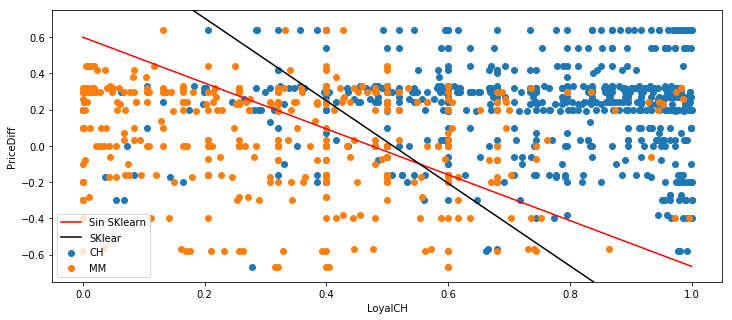

In [16]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)


plt.scatter(X[ii],Y[ii], label='CH')#, color = 'blue')
plt.scatter(X[~ii],Y[~ii],label = 'MM')#, color = 'orange')
#plt.plot(x,recta(x))
plt.plot(x,recta(x,m=-valores[1]/valores[2],b=-valores[0]/valores[2]), color='r', label = 'Sin SKlearn')
plt.plot(x,recta(x,m=-coef[0]/coef[1],b=-inter/coef[1]), color='black', label='SKlear')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.xlim(-0.05,1.05)
plt.ylim(-0.75,0.75)
plt.legend()
plt.savefig("RectaqueDivide.png")

jj = (Z > valores[0]+valores[1]*X+valores[2]*Y)




plt.legend()

In [17]:
#!wget https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv
datos = pd.read_csv('Cars93.csv')
Z = datos['MPG.city'].copy()
media = Z.mean()
ii3 = (Z>media)
Z[ii3] = 1
Z[~ii3] = 0
predictores = ["Fuel.tank.capacity", "Horsepower", "Length", "Rev.per.mile", "Turn.circle", "Weight"]
X = datos[predictores]
Z = Z.values.reshape(-1, 1) 
#X[predictores[0]]
#X




In [22]:
svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(X,Z)
coef = svm.coef_[0]
inter = svm.intercept_
print(coef)
print(inter)
#pendientes = -coef/inter
dic= dict(itertools.zip_longest(predictores, coef))
dic

[-0.00131229 -0.00196573  0.00952432  0.00081785  0.00338227 -0.00117701]
[7.97732709e-05]


/home/clarkguilty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Fuel.tank.capacity': -0.0013122948809711865,
 'Horsepower': -0.0019657271973763414,
 'Length': 0.009524321666313923,
 'Rev.per.mile': 0.0008178518312729377,
 'Turn.circle': 0.003382265940919164,
 'Weight': -0.0011770082129415643}

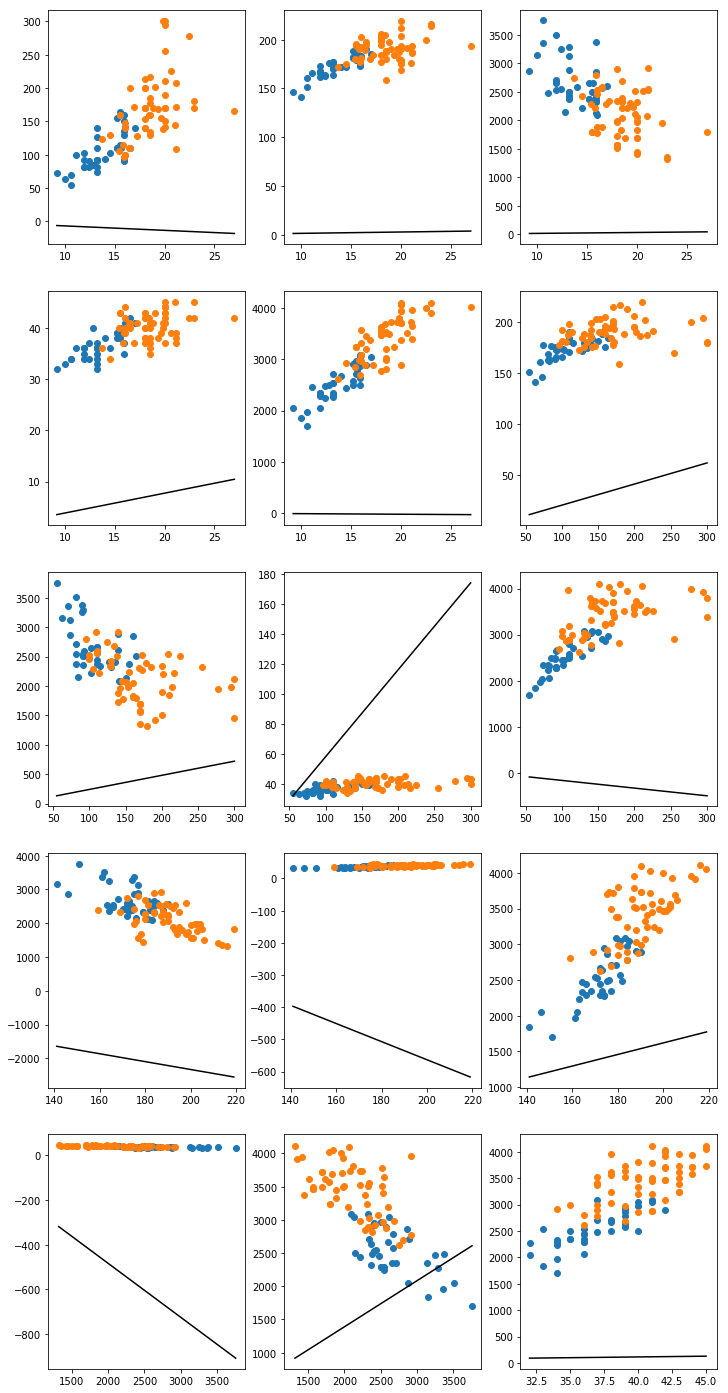

In [25]:
import itertools
combinations = itertools.combinations(predictores, 2)
combinations

#for i in combinations:
#    print(i)
    

fig = plt.figure(figsize=(12,25))
indice = 1
for comb in combinations:
    c = list(comb)
    #print(c)
    fig.add_subplot(5,3,indice)
    ToPlot = X[c]
    xp = ToPlot[c[0]]
    yp = ToPlot[c[1]]
   # print(xToPlot)
    #print(xToPlot.shape)
    #print(Z.shape)
    plt.scatter(xp[ii3],yp[ii3])
    plt.scatter(xp[~ii3],yp[~ii3])
    x = np.linspace(np.min(xp),np.max(xp),200)
    plt.plot(x,recta(x,m=-dic[c[0]]/dic[c[1]],b=-inter/dic[c[1]]), color='black', label='SKlear')
    

    indice+=1
    

plt.show()


#plt.plot(x,recta(x))
#plt.plot(x,recta(x,m=-valores[1]/valores[2],b=-valores[0]/valores[2]), color='r', label = 'Sin SKlearn')
#plt.plot(x,recta(x,m=-coef[0]/coef[1],b=-inter/coef[1]), color='black', label='SKlear')
#plt.xlabel('LoyalCH')
#plt.ylabel('PriceDiff')
#plt.xlim(-0.05,1.05)
#plt.ylim(-0.75,0.75)
#plt.legend()
#plt.savefig("RectaqueDivide.png")

#jj = (Z > valores[0]+valores[1]*X+valores[2]*Y)




#plt.legend()

In [ ]:
def recta(x,m=-7/3,b=0.8):
    return x*m+b

def recta2(x1,x2,b0,b1,b2):
    return b0 + b1*x1+b2*x2
    



def model3(xd, b0, bs):
    total = 0
    for i in range(len(bs)):
        total += bs[i]*x[predictores[i]]
    return b0 + 

def loglikelihood(x1_obs, x2_obs, y_obs, b0,b1,b2):
    d = y_obs -  model(x1_obs,x2_obs,b0,b1,b2)
    d = d/y_obs.std()
    d = -0.5 * np.sum(d**2)
    return d

def logprior(b0,b1,b2):
    p = -np.inf
    if b0 >-1.0 and b0<1.0 and b1 >-1.0 and b1<1.0 and b2 >-1.0 and b2<1.0 :
        p = 0.0
    return p



def MC(sigmas,N = 5000):
    
    lista_b0 = [ran.random()*2-1]
    lista_b1 = [ran.random()*2-1]
    lista_b2 = [ran.random()*2-1]
    logposterior = [loglikelihood(X,Y, Z, lista_b0[0], lista_b1[0], lista_b2[0]) 
                    + logprior(lista_b0[0], lista_b1[0], lista_b2[0])]
    
    

    for i in range(1,N):
        pb0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigmas[0])
        pb1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigmas[1])
        pb2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigmas[2])

        
        logposterior_viejo = loglikelihood(X,Y,Z, lista_b0[i-1], lista_b1[i-1], lista_b2[i-1]) + logprior(lista_b0[i-1], lista_b1[i-1], lista_b2[i-1])
        logposterior_nuevo = loglikelihood(X,Y,Z, pb0, pb1, pb2) + logprior(pb0, pb1, pb2)
        
        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            lista_b0.append(pb0)
            lista_b1.append(pb1)
            lista_b2.append(pb2)
            logposterior.append(logposterior_nuevo)
        else:
            lista_b0.append(lista_b0[i-1])
            lista_b1.append(lista_b1[i-1])
            lista_b2.append(lista_b2[i-1])
            logposterior.append(logposterior_viejo)
    lista_b0 = np.array(lista_b0)
    lista_b1 = np.array(lista_b1)
    lista_b2 = np.array(lista_b2)
    logposterior = np.array(logposterior)
    return np.median(lista_b0), np.median(lista_b1), np.median(lista_b2)
valores = MC([1,1,1])
print(valores)